# Notebook for Nonesuch Shale pmag thermal demagnetization analyses

This Python notebook is for analyzing and visualizng thermal demagnetization data of paleomagnetic samples collected from the Nonesuch Shale. 

A total of four components are identified and are named as the following:
- a lt component: low temperature component, oftenly corresponds to the present day local field direction in geographic coordinates
    - this might be associated with component 4 (low coercivity component about <50 mT) from rock mag unmix result
- a mt component: magnetite temperature component, oftenly fitted in a small unblocking temperature window between 500 and 580, interpreted to be the remanence carried by dertital magnetite and hold a remanence similar to the high temperature component hdt of detrital hematite 
- a hdt component: hematite detrital remanence component, oftenly fitted in a small range of unblocking temperature steps from 600 to 680 that have a similar direction to the mt component
- a hct component: hematite chemical remanence component, oftenly fitted in a wide range of unblocking temperature steps from 300 to 600 that display distinct direction than the mt and hdt components
    - this might be associated with component 2 (high coercivity component aboue >500 mT) from rock mag unmix result

In [1]:
import pandas as pd
import numpy as np
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
mpl.rc('pdf',fonttype = 42)

## Load Potato River Falls demag data

In [3]:
Nonesuch_demag_site = pd.read_csv('../Data/Thermal_PF18/sites.txt', sep='\t', header=1)
Nonesuch_demag_specimen = pd.read_csv('../Data/Thermal_PF18/specimens.txt', sep='\t', header=1)
Nonesuch_demag_specimen['lon'] = -90.5
Nonesuch_demag_specimen['lat'] = 46.5
Nonesuch_demag_specimen = ipmag.vgp_calc(Nonesuch_demag_specimen, tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)

display(Nonesuch_demag_site.head())
display(Nonesuch_demag_specimen.head())

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,...,analysts,criteria,software_packages,citations,method_codes,result_quality,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,PF18,Northern Wisconsin,PF18-160:PF18-161:PF18-162:PF18-163:PF18-1:PF1...,PF18-160a:PF18-161a:PF18-162a:PF18-163a:PF18-1...,4.3,hct,250.0,50.1,87,14,...,NaN,ACCEPT,pmagpy-4.2.80: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,5.8,3.8,9.8,214.6
1,PF18,Northern Wisconsin,PF18-102:PF18-104:PF18-105:PF18-107:PF18-108:P...,PF18-102a:PF18-104a:PF18-105a:PF18-107a:PF18-1...,2.7,hdt,218.5,49.6,26,105,...,NaN,ACCEPT,pmagpy-4.2.80: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:LP-DC4:DE-FM,g,3.6,2.4,-5.6,236.9
2,PF18,Northern Wisconsin,PF18-103:PF18-104:PF18-105:PF18-106:PF18-107:P...,PF18-103a:PF18-104a:PF18-105a:PF18-106a:PF18-1...,1.4,lt,356.0,74.2,122,83,...,NaN,ACCEPT,pmagpy-4.2.80: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,2.5,2.3,75.8,261.4
3,PF18,Northern Wisconsin,PF18-103:PF18-105:PF18-106:PF18-110:PF18-112:P...,PF18-103a:PF18-105a:PF18-106a:PF18-110a:PF18-1...,2.2,mht,264.6,54.3,90,46,...,NaN,ACCEPT,pmagpy-4.2.80: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,3.1,2.2,21.2,208.3
4,PF18,Northern Wisconsin,PF18-100:PF18-101:PF18-102:PF18-108:PF18-10:PF...,PF18-100a:PF18-101a:PF18-102a:PF18-108a:PF18-1...,2.7,mt,223.1,54.2,38,77,...,NaN,ACCEPT,pmagpy-4.2.80: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,3.8,2.7,0.0,235.3


,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,location,site,specimen_name,lon,lat,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,PF18-100a,NaN,PF18-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Northern Wisconsin,PF18,NaN,-90.5,46.5,NaN,NaN,NaN,NaN,NaN
1,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,mt,271.1,7.1,1.0,5.0,100.0,...,Northern Wisconsin,PF18,PF18-100a,-90.5,46.5,3.563681,3.340909,181.158224,-3.340909,1.158224
2,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,mt,217.8,52.5,1.0,5.0,0.0,...,Northern Wisconsin,PF18,PF18-100a,-90.5,46.5,33.088776,-3.422007,238.540871,3.422007,58.540871
3,PF18-100a,PF18-100a_LP-DIR-T,PF18-100,NaN,mt,299.0,61.2,1.0,5.0,-1.0,...,Northern Wisconsin,PF18,PF18-100a,-90.5,46.5,42.286414,47.302351,196.917803,-47.302351,16.917803
4,PF18-101a,NaN,PF18-101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Northern Wisconsin,PF18,NaN,-90.5,46.5,NaN,NaN,NaN,NaN,NaN


## plot all components

In [4]:
Nonesuch_demag_site_lt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'lt') & (Nonesuch_demag_site['dir_tilt_correction'] == 0)]
Nonesuch_demag_site_mt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'mt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hct = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hct') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hdt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hdt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_mht = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'mht') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]

Nonesuch_demag_specimen_lt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'lt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]
Nonesuch_demag_specimen_mt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hct = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hct') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hdt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hdt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_mht = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mht') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]

In [5]:
lt_color_light = 'limegreen'
lt_color_dark = 'darkgreen'
mt_color_light = '#99BFCC'
mt_color_dark = '#0000FC'
mht_color_light = '#FFD580'
mht_color_dark = 'orange'
hdt_color_light = '#CCB4CD'
hdt_color_dark = '#9E1EED'
hct_color_light = '#FFCCCC'
hct_color_dark = '#FA5F5F'

### low temp remanence

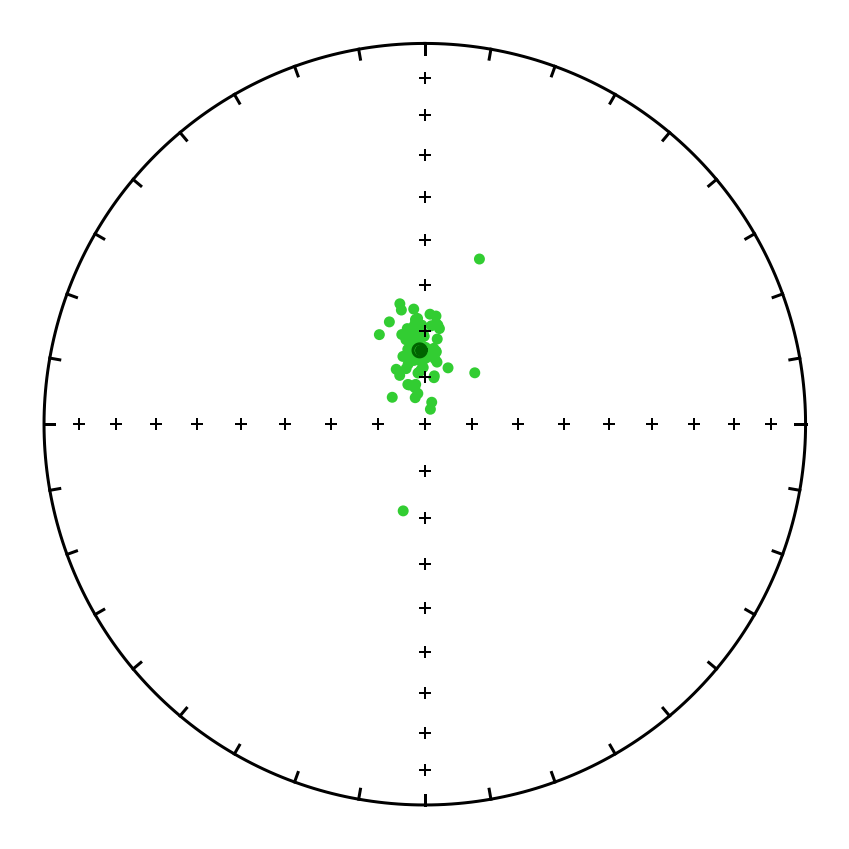

In [6]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_lt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_lt['dir_inc'].tolist(), color = lt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_lt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_lt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = lt_color_dark)

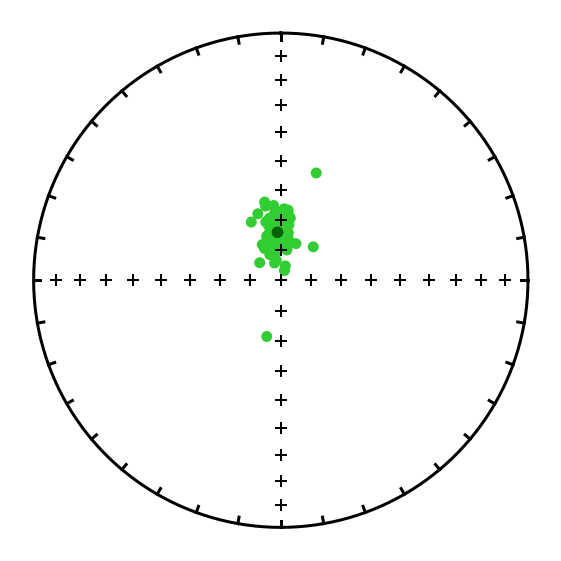

In [7]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_lt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_lt['dir_inc'].tolist(), color = lt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_lt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_lt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = lt_color_dark)
plt.savefig('./code_output/directions_lt.pdf')

### magnetite remanence

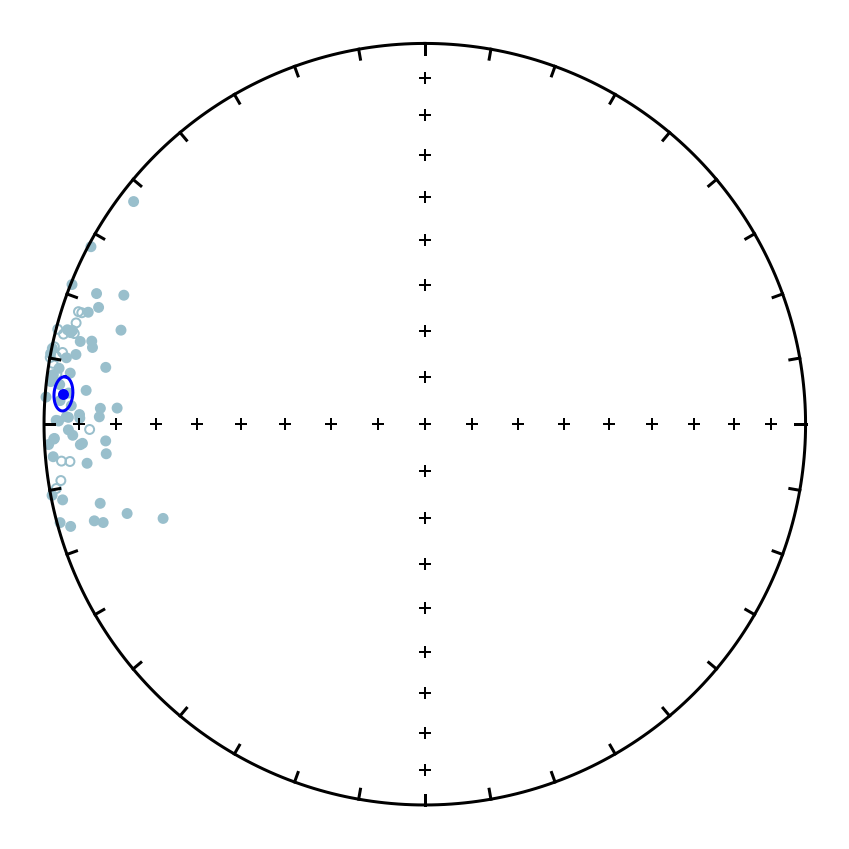

In [8]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mt['dir_inc'].tolist(), color = mt_color_light)

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)

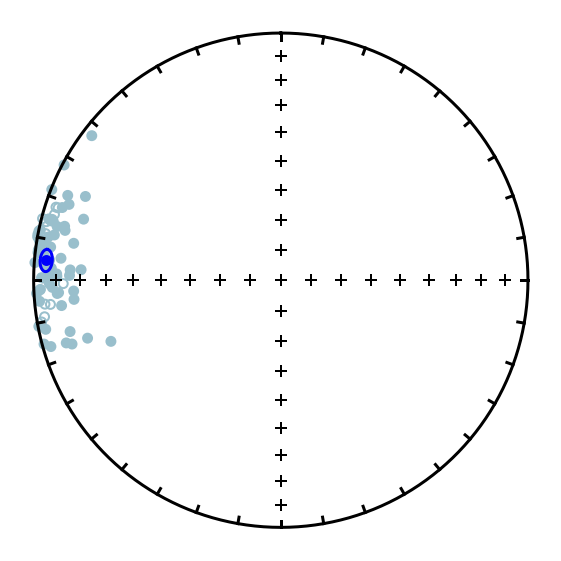

In [9]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mt['dir_inc'].tolist(), color = mt_color_light)

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)
plt.savefig('./code_output/directions_mt.pdf')

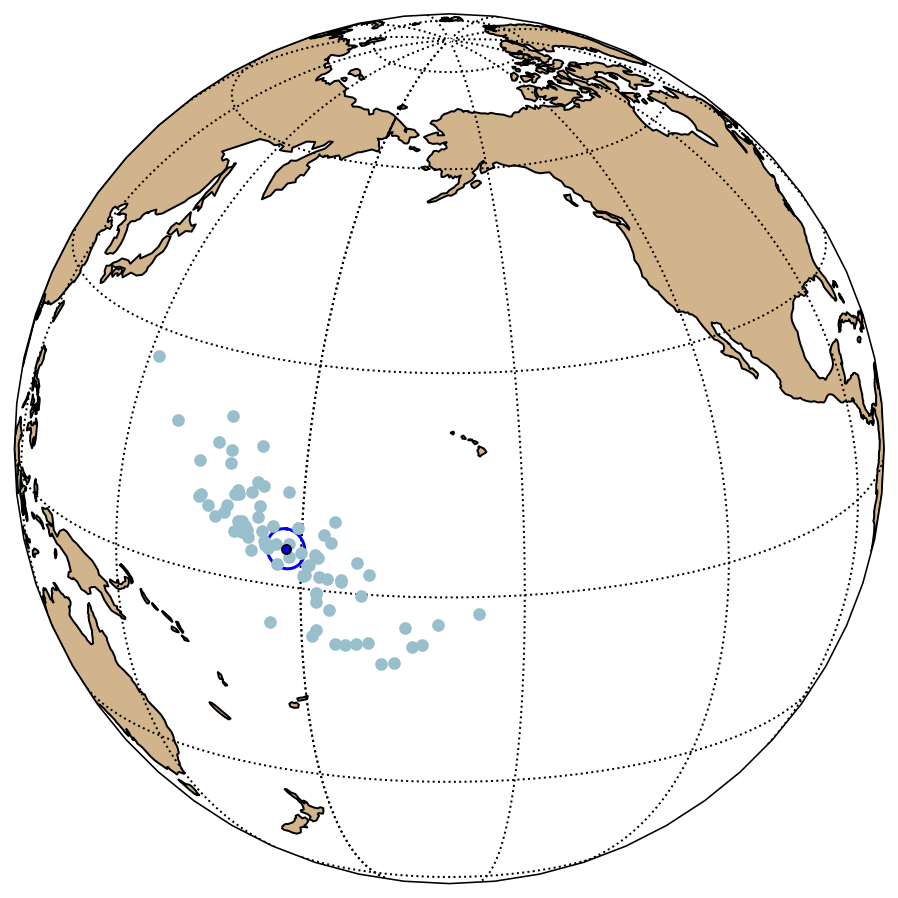

In [10]:
mt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(mt_axis, Nonesuch_demag_specimen_mt['vgp_lon'], Nonesuch_demag_specimen_mt['vgp_lat'], 
               markersize = 40, color = mt_color_light, edge = 'none')
ipmag.plot_pole(mt_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)

### hematite chemical remanence

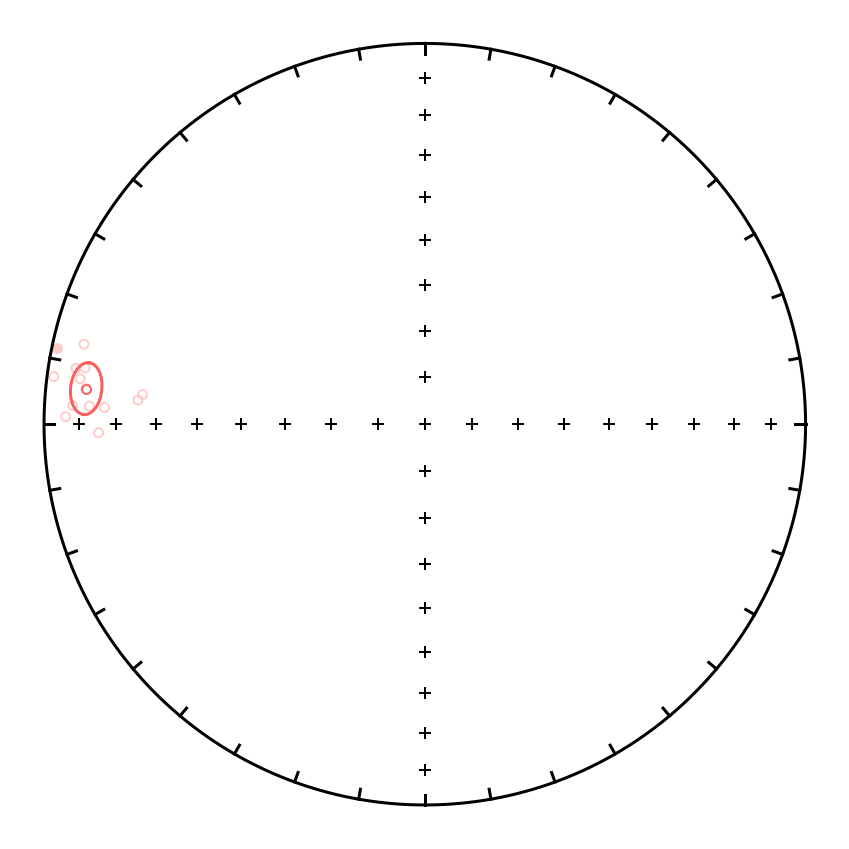

In [11]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hct['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hct['dir_inc'].tolist(), 
              color = hct_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)

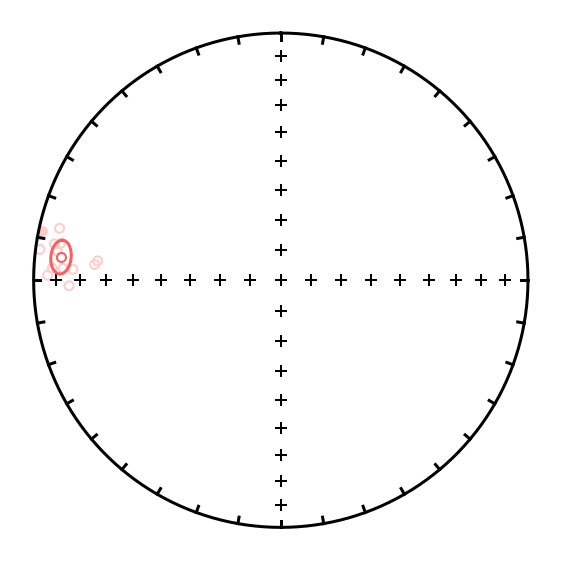

In [12]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hct['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hct['dir_inc'].tolist(), 
              color = hct_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)
plt.savefig('./code_output/directions_hct.pdf')

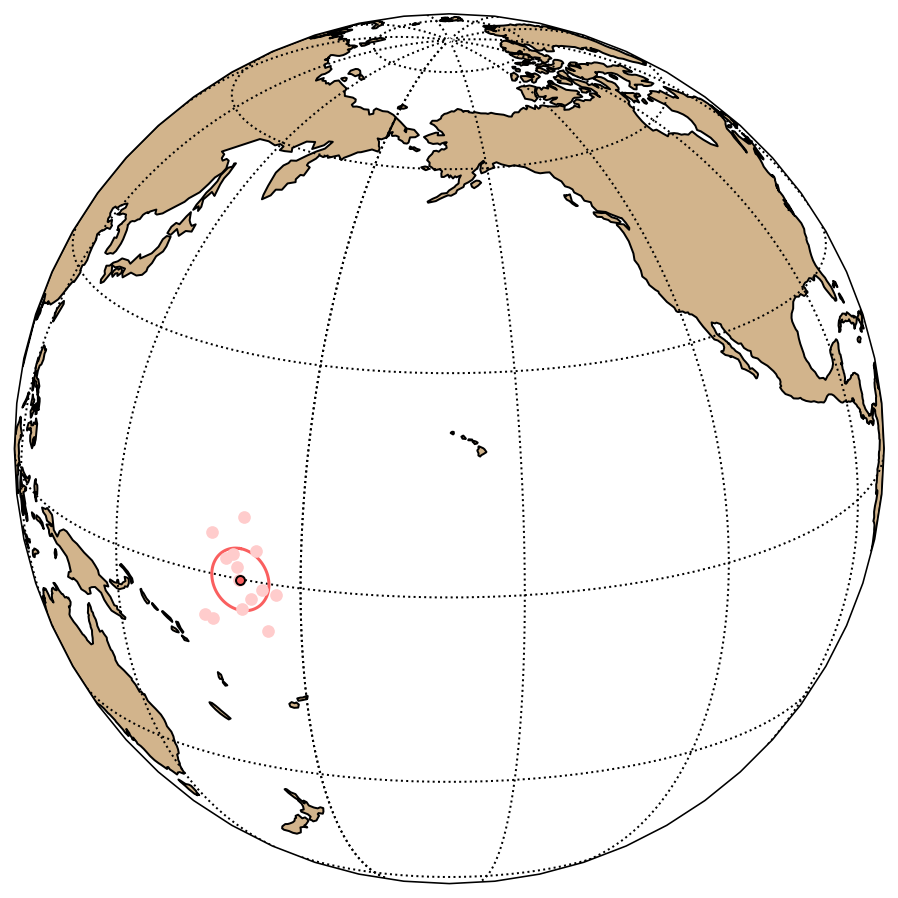

In [13]:
hct_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hct_axis, Nonesuch_demag_specimen_hct['vgp_lon'], Nonesuch_demag_specimen_hct['vgp_lat'], 
               markersize = 40, color = hct_color_light, edge = 'none')
ipmag.plot_pole(hct_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)

In [14]:
Nonesuch_demag_site_hct['vgp_lon'].iloc[0], Nonesuch_demag_site_hct['vgp_lat'].iloc[0], Nonesuch_demag_site_hct['dir_alpha95'].iloc[0]

(171.2, -0.1, 4.3)

### mht remanence (maghemite?)

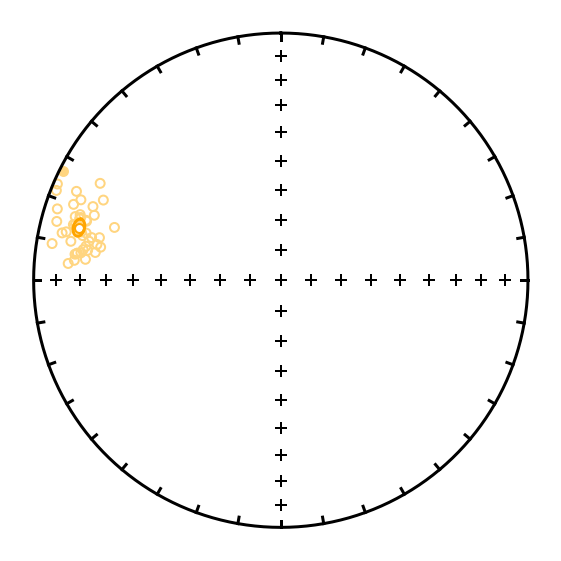

In [15]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mht['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mht['dir_inc'].tolist(), 
              color = mht_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_mht['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mht['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = mht_color_dark)
plt.savefig('./code_output/directions_mht.pdf')

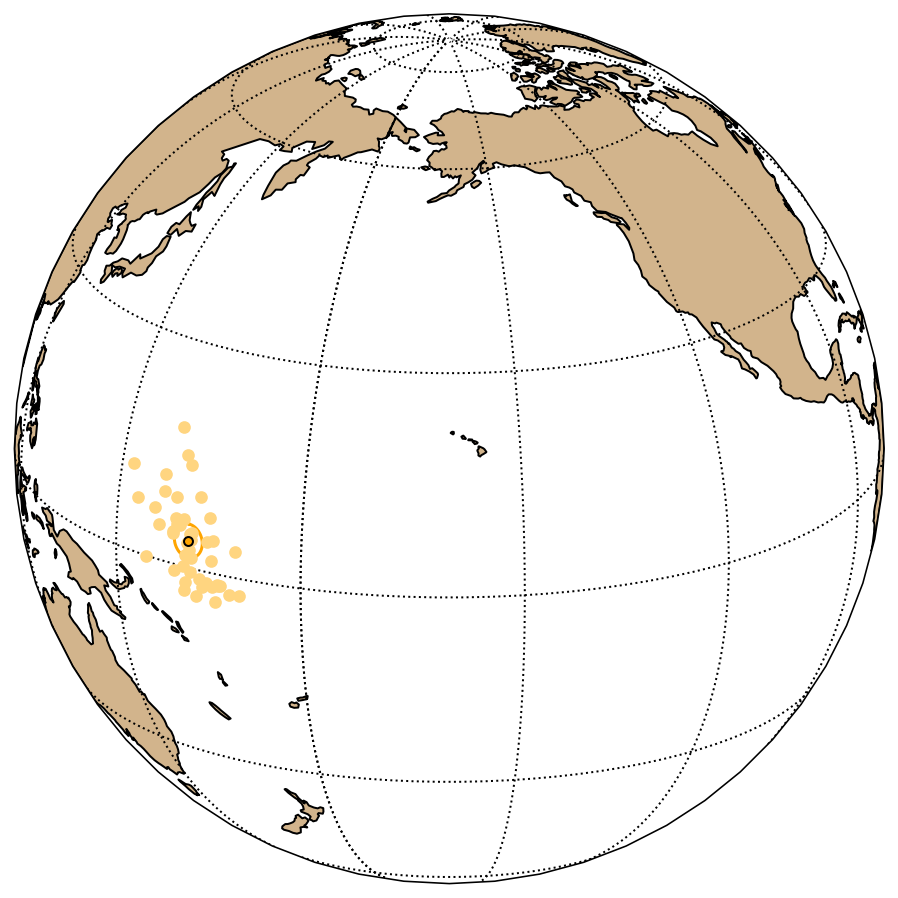

In [16]:
mht_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(mht_axis, Nonesuch_demag_specimen_mht['vgp_lon'], Nonesuch_demag_specimen_mht['vgp_lat'], 
               markersize = 40, color = mht_color_light, edge = 'none')
ipmag.plot_pole(mht_axis, plon=Nonesuch_demag_site_mht['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mht['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = mht_color_dark)

### hematite detrital remanence

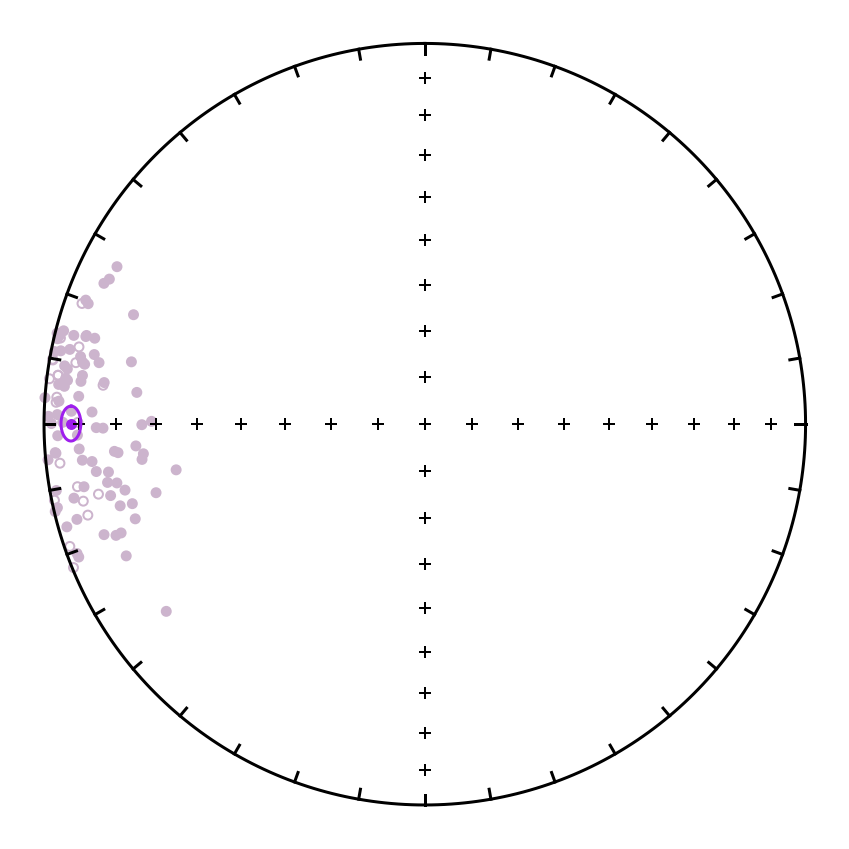

In [17]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 
              color = hdt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)

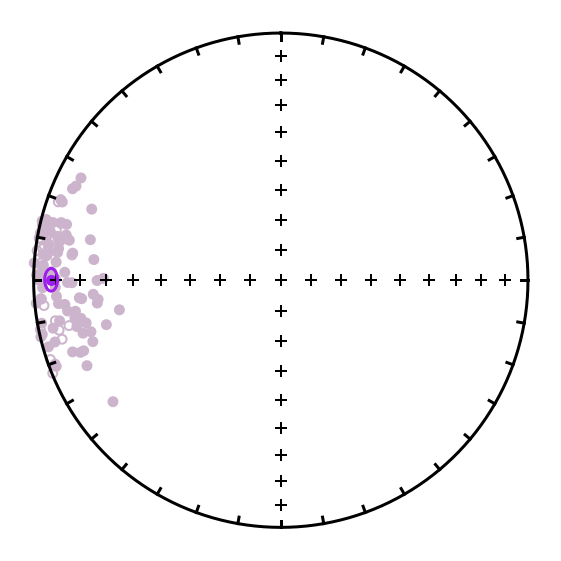

In [18]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 
              color = hdt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)
plt.savefig('./code_output/directions_hdt.pdf')

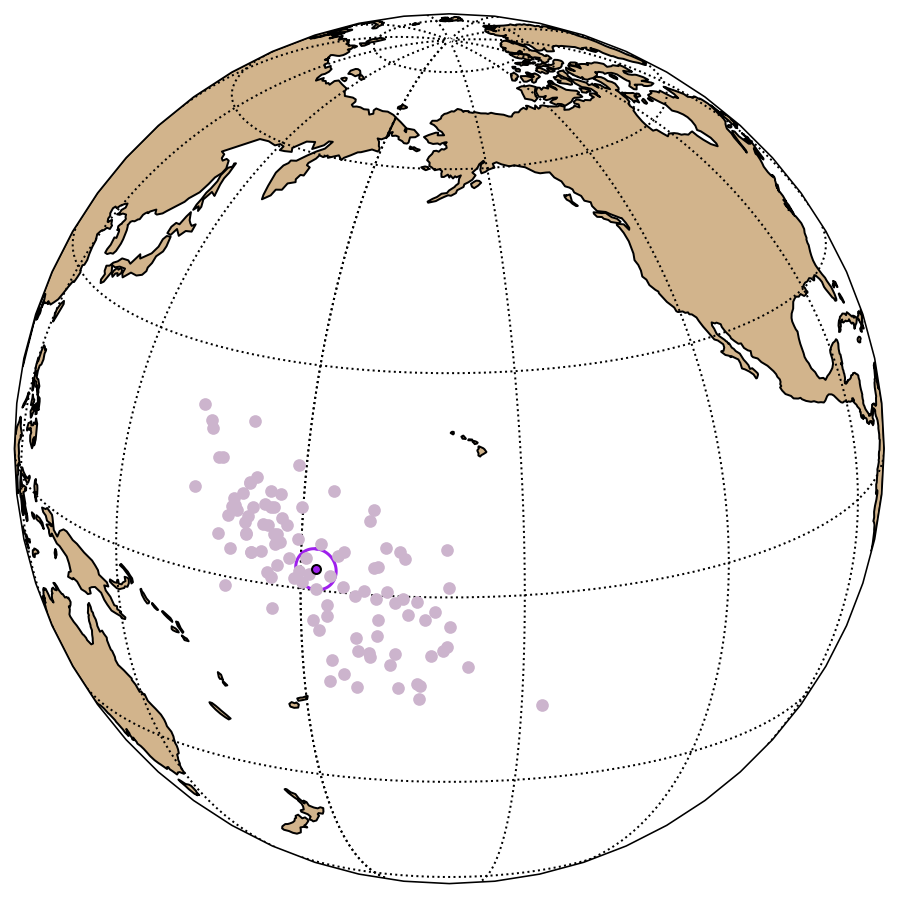

In [19]:
hdt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hdt_axis, Nonesuch_demag_specimen_hdt['vgp_lon'], Nonesuch_demag_specimen_hdt['vgp_lat'], 
               markersize = 40, color = hdt_color_light, edge = 'none')
ipmag.plot_pole(hdt_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)


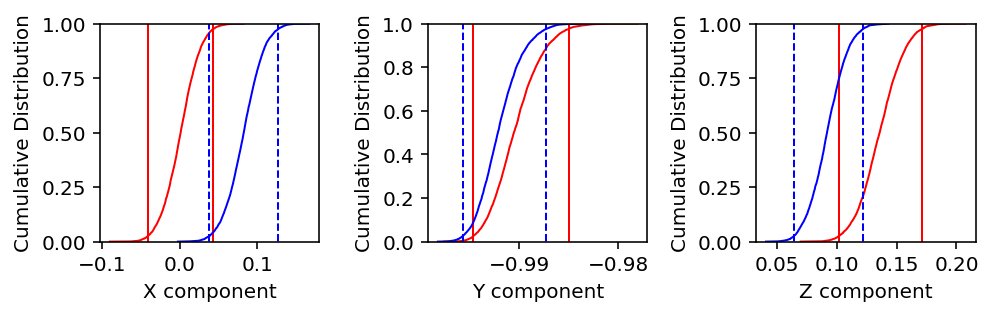

In [20]:
Nonesuch_hdt_directions= ipmag.make_di_block(Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),
                                             Nonesuch_demag_specimen_hdt['dir_inc'].tolist())

Nonesuch_mt_directions= ipmag.make_di_block(Nonesuch_demag_specimen_mt['dir_dec'].tolist(),
                                             Nonesuch_demag_specimen_mt['dir_inc'].tolist())

ipmag.common_mean_bootstrap(Nonesuch_hdt_directions,Nonesuch_mt_directions)

Bootstrapping.... be patient

The original inclination was: 7.78

The corrected inclination is: 15.22
with bootstrapped confidence bounds of: 10.83 to 19.33
and elongation parameter of: 2.61
The flattening factor is: 0.46
with bootstrapped confidence bounds of: 0.71 to 0.39


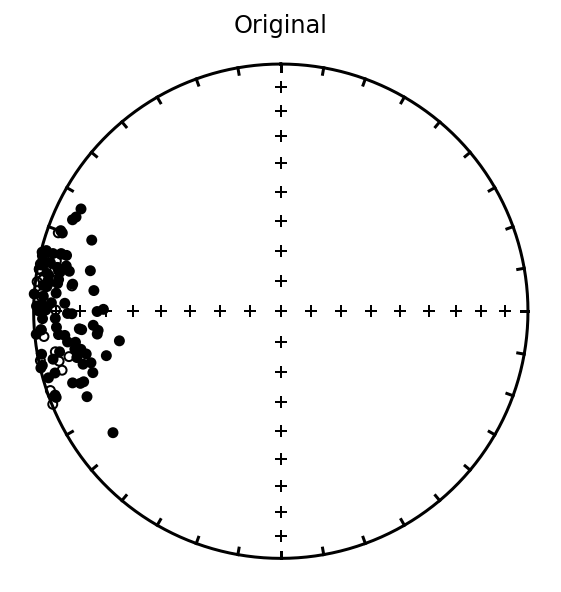

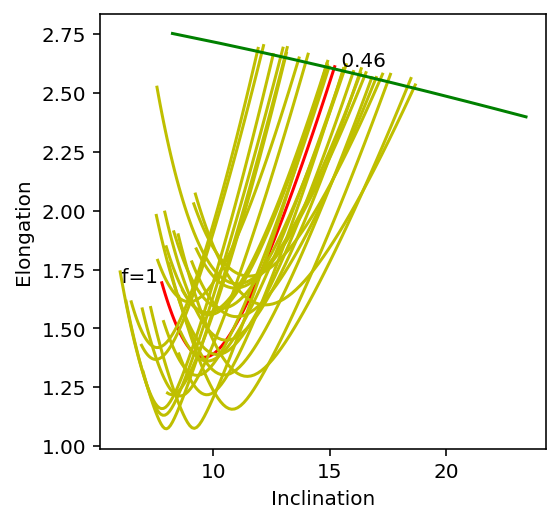

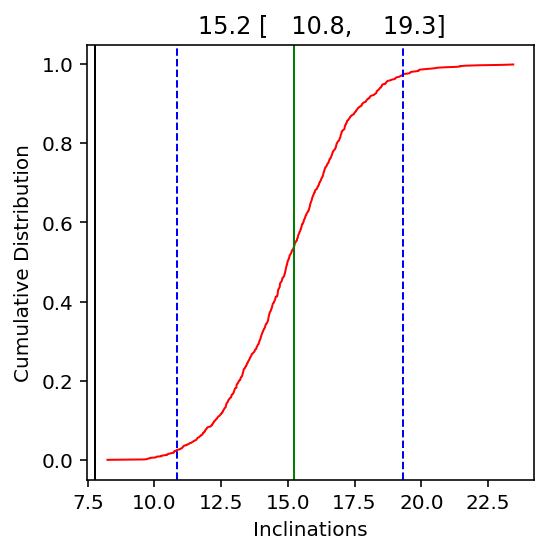

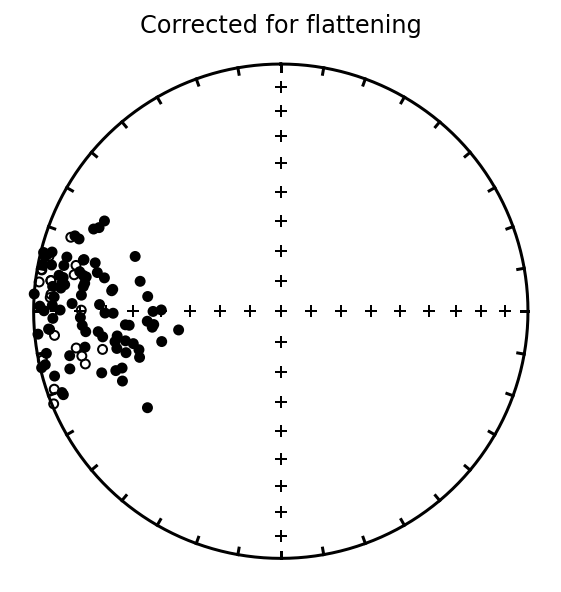

In [21]:
ipmag.find_ei(Nonesuch_hdt_directions)

Bootstrapping.... be patient

The original inclination was: 5.2

The corrected inclination is: 12.41
with bootstrapped confidence bounds of: 7.92 to 17.02
and elongation parameter of: 2.7
The flattening factor is: 0.38
with bootstrapped confidence bounds of: 0.65 to 0.3


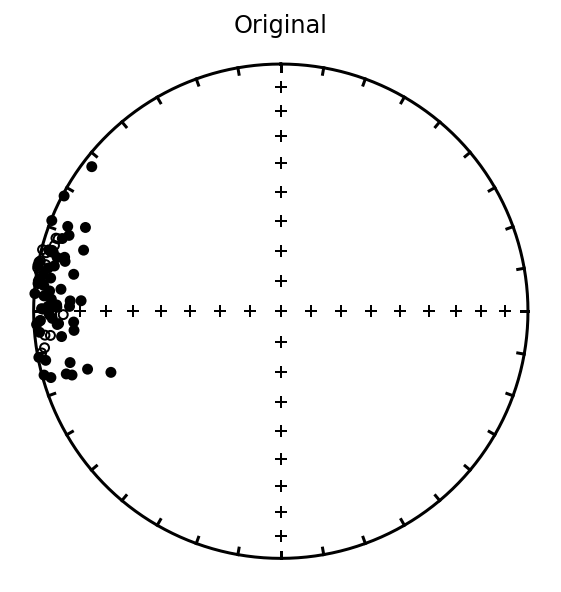

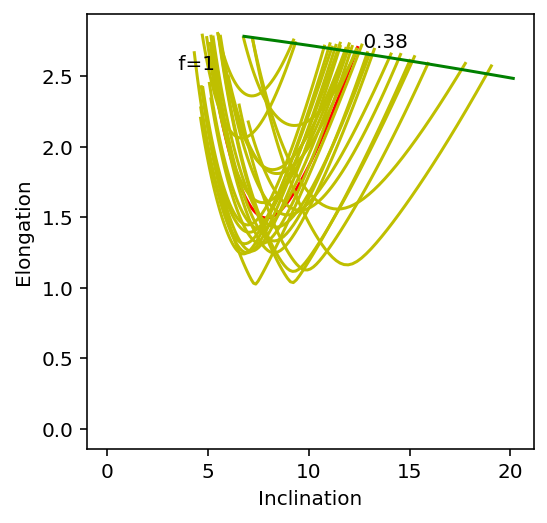

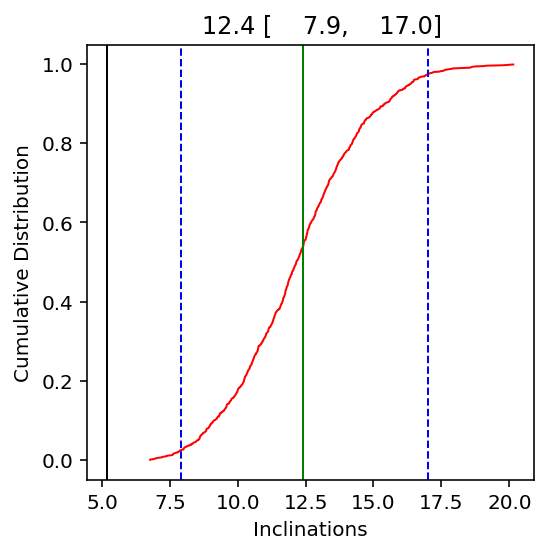

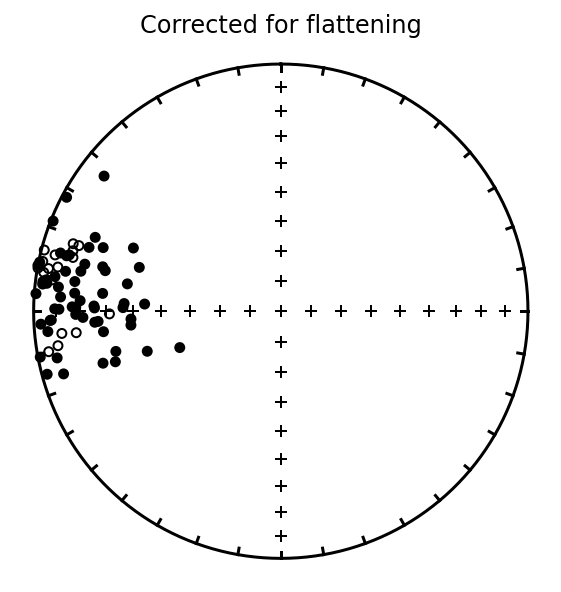

In [22]:
ipmag.find_ei(Nonesuch_mt_directions)

Bootstrapping.... be patient

The original inclination was: 6.67

The corrected inclination is: 13.97
with bootstrapped confidence bounds of: 10.86 to 17.34
and elongation parameter of: 2.65
The flattening factor is: 0.43
with bootstrapped confidence bounds of: 0.61 to 0.37


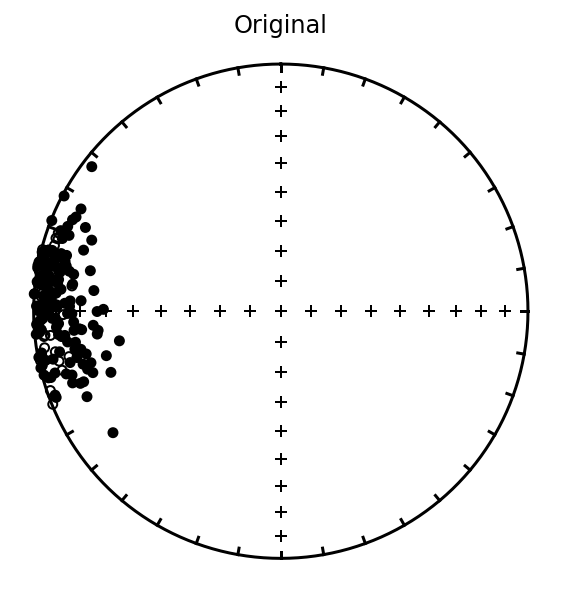

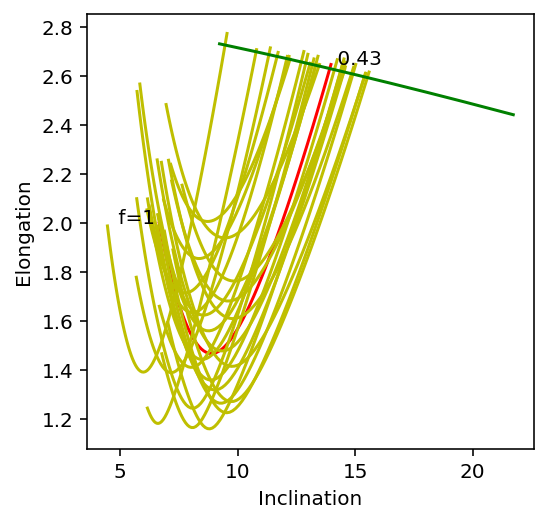

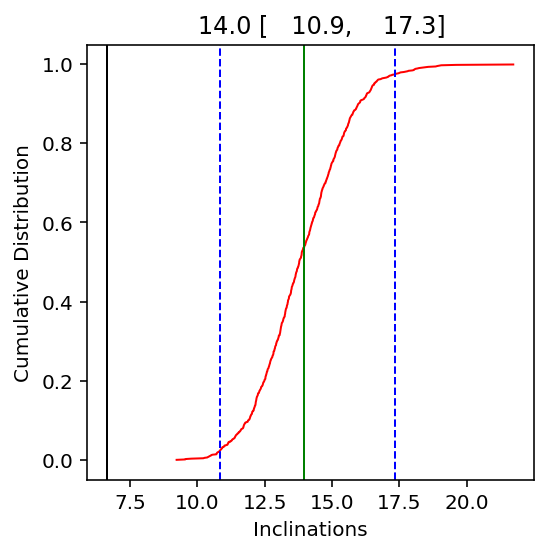

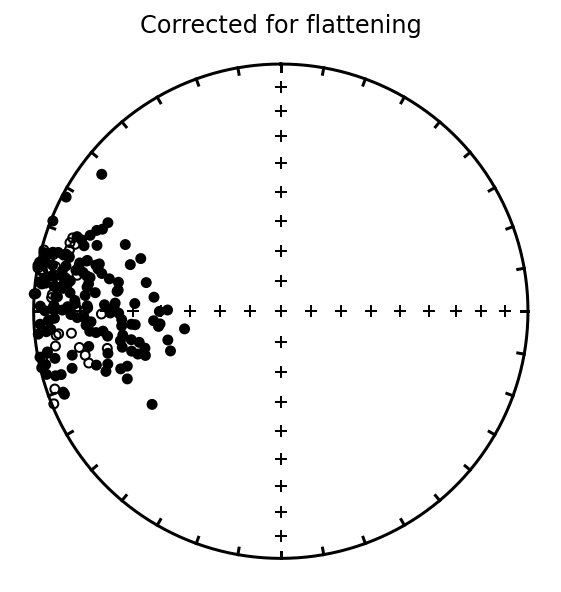

In [23]:
ipmag.find_ei(Nonesuch_hdt_directions+Nonesuch_mt_directions)

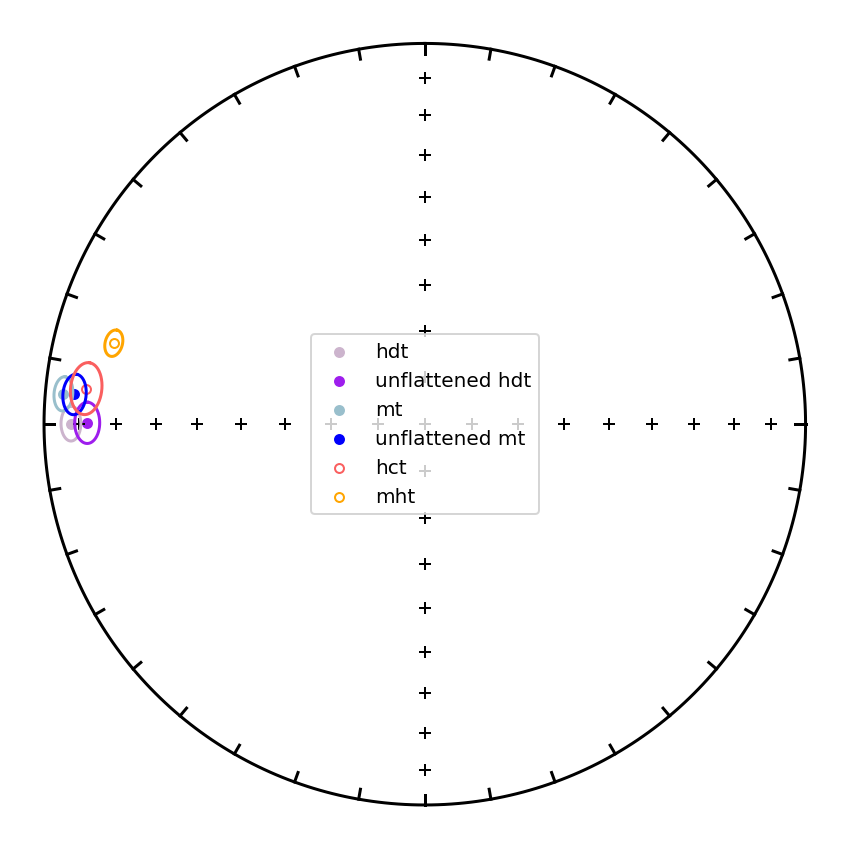

In [24]:
hdt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 0.6)
hdt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),inc=hdt_unsquished_incs)

mt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_mt['dir_inc'].tolist(), 0.6)
mt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(),inc=mt_unsquished_incs)

plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_light,label='hdt')

ipmag.plot_di_mean(dec=hdt_unsquished_mean['dec'], 
                   inc=hdt_unsquished_mean['inc'], 
                   a95=hdt_unsquished_mean['alpha95'], 
                   color = hdt_color_dark,label='unflattened hdt')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_light,label='mt')

ipmag.plot_di_mean(dec=mt_unsquished_mean['dec'], 
                   inc=mt_unsquished_mean['inc'], 
                   a95=mt_unsquished_mean['alpha95'], 
                   color = mt_color_dark,label='unflattened mt')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark,label='hct')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mht['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mht['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = 'orange',label='mht')

plt.legend()

In [25]:
combined_mt_hdt_dec = Nonesuch_demag_specimen_hdt['dir_dec'].tolist() + Nonesuch_demag_specimen_mt['dir_dec'].tolist()
combined_mt_hdt_inc = hdt_unsquished_incs + mt_unsquished_incs

In [26]:
combined_dirs_locs = []
for n in range(0, len(combined_mt_hdt_dec)):
    combined_dirs_locs.append([combined_mt_hdt_dec[n], combined_mt_hdt_inc[n], 1.0,46.461,-90.530])

combined_plong, combined_plat, dp, dm = pmag.dia_vgp(combined_dirs_locs)

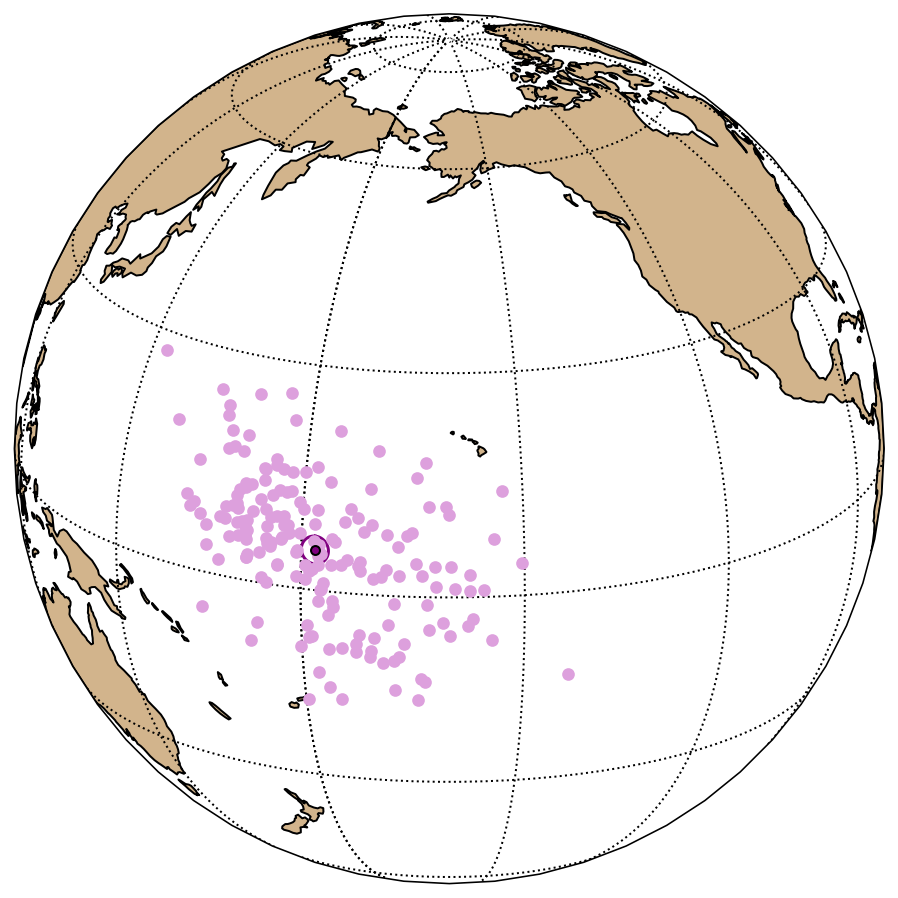

In [120]:
hdt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hdt_axis, combined_plong, combined_plat, markersize = 40, color = 'plum', edge = 'none')

combined_pole = ipmag.fisher_mean(combined_plong, combined_plat)
ipmag.plot_pole(hdt_axis, plon=combined_pole['dec'], 
                   plat=combined_pole['inc'], 
                   A95=combined_pole['alpha95'], 
                   color = 'purple')

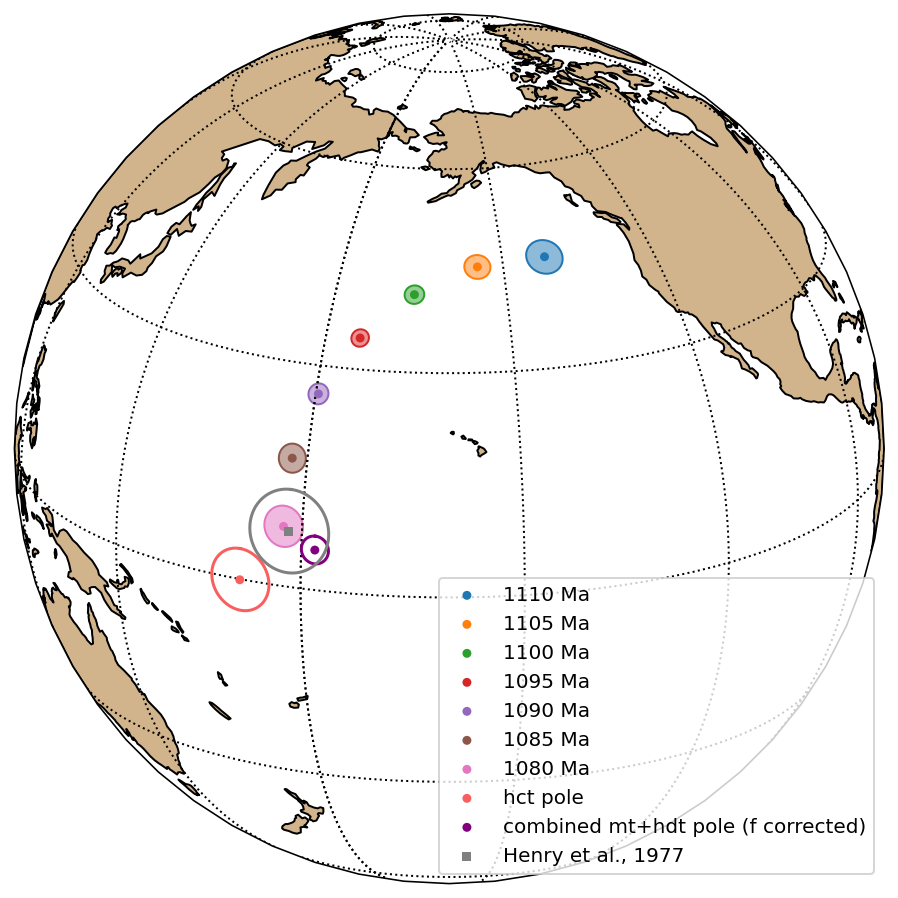

In [127]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

pole_axis = ipmag.make_orthographic_map(200, 20)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(pole_axis,fisher0['dec'],fisher0['inc'],theta0,label='1110 Ma', color = 'C0', edgecolor='none', 
                filled_pole=True, fill_color='C0', fill_alpha=0.5)

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(pole_axis,fisher1['dec'],fisher1['inc'],theta1,label='1105 Ma', color = 'C1', edgecolor='none',
                filled_pole=True, fill_color='C1', fill_alpha=0.5)

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(pole_axis,fisher2['dec'],fisher2['inc'],theta2,label='1100 Ma', color = 'C2', edgecolor='none',
                filled_pole=True, fill_color='C2', fill_alpha=0.5)

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(pole_axis,fisher3['dec'],fisher3['inc'],theta3,label='1095 Ma', color = 'C3', edgecolor='none',
                filled_pole=True, fill_color='C3', fill_alpha=0.5)

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(pole_axis,fisher4['dec'],fisher4['inc'],theta4,label='1090 Ma', color = 'C4', edgecolor='none',
                filled_pole=True, fill_color='C4', fill_alpha=0.5)

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(pole_axis,fisher5['dec'],fisher5['inc'],theta5,label='1085 Ma', color = 'C5', edgecolor='none',
                filled_pole=True, fill_color='C5', fill_alpha=0.5)

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(pole_axis,fisher6['dec'],fisher6['inc'],theta6,label='1080 Ma', color = 'C6', edgecolor='none',
                filled_pole=True, fill_color='C6', fill_alpha=0.5)

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_lt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_lt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
#                    color = 'darkgreen', edgecolor = 'none', label = 'lt pole')

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
#                    color = 'darkorange', edgecolor = 'none', label = 'mt pole')

ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark, edgecolor = 'none', label = 'hct pole')

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
#                    color = 'purple', edgecolor = 'none', label = 'hdt pole')

ipmag.plot_pole(pole_axis, plon=combined_pole['dec'], 
                   plat=combined_pole['inc'], 
                   A95=combined_pole['alpha95'], 
                   color = 'purple', edgecolor = 'none', label = 'combined mt+hdt pole (f corrected)')

ipmag.plot_pole(pole_axis, 178.1, 7.6, 5.6, color = 'grey', edgecolor = 'none', marker = 's', label = 'Henry et al., 1977')
plt.legend()
plt.show()

In [157]:
Nonesuch_measurements_all = pd.read_csv('../Data/Thermal_PF18/measurements.txt', sep='\t', skiprows=1)
Nonesuch_measurements = Nonesuch_measurements_all.loc[Nonesuch_measurements_all.quality == 'g']

Nonesuch_measurements_75 = Nonesuch_measurements[Nonesuch_measurements.specimen == 'PF18-75a']
Nonesuch_measurements_75.reset_index(inplace=True)

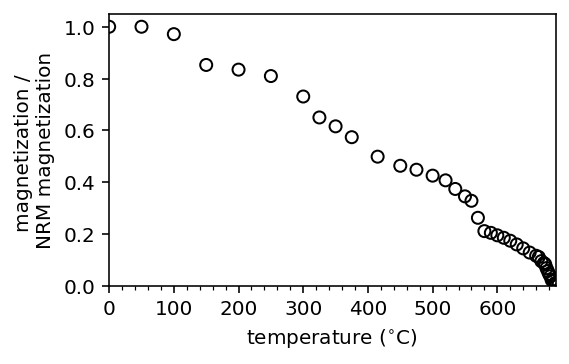

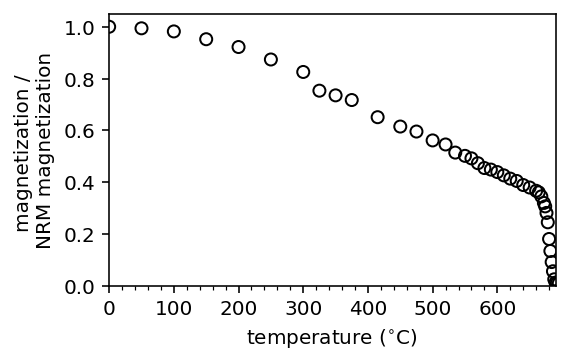

In [159]:
plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_76.treat_temp-273,
            Nonesuch_measurements_76.magn_moment/Nonesuch_measurements_76.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_76.pdf')

plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_75.treat_temp-273,
            Nonesuch_measurements_75.magn_moment/Nonesuch_measurements_75.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_75.pdf')

# plt.ylabel('magnetization / \nNRM magnetization')
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.subplot(1,3,2)
# plt.scatter(Nonesuch_measurements_Nonesuch33.treat_temp-273,
#             Nonesuch_measurements_Nonesuch33.magn_moment/Nonesuch_measurements_Nonesuch33.magn_moment[0],
#             facecolors='none', edgecolors='k')
# plt.xlim(0,690)
# plt.ylim(0,1.1)
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.gca().set_yticklabels([])
# plt.subplot(1,3,3)
# plt.scatter(Nonesuch_measurements_Nonesuch41.treat_temp-273,
#             Nonesuch_measurements_Nonesuch41.magn_moment/Nonesuch_measurements_Nonesuch41.magn_moment[0],
#             facecolors='none', edgecolors='k')
# plt.xlim(0,690)
# plt.ylim(0,1.1)
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.gca().set_yticklabels([])
# plt.tight_layout()
# plt.savefig('./code_output/demag.svg')
plt.show()